In [27]:
!pip install --upgrade tensorflow


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
import numpy as np
import pandas as pd
import zipfile
import os
import seaborn as sns
import matplotlib.patheffects as pe
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [29]:
zip_path = "archive (4).zip"
extract_to = "dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("✅ Dataset berhasil diekstrak.")

✅ Dataset berhasil diekstrak.


In [30]:
!pip install split-folders


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
import splitfolders

# Path asal dataset (folder hasil ekstrak)
input_folder = "dataset"

# Path tujuan folder terpisah (otomatis dibuat)
output_folder = "dataset_split"

# Bagi dataset
splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(.8, .1, .1))


Copying files: 13853 files [00:22, 623.40 files/s]


In [32]:
train_dir = "dataset_split/test"
val_dir = "dataset_split/val"
test_dir = "dataset_split/test"

IMG_SIZE = (224, 224)  # ukuran input gambar (bisa disesuaikan)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 1404 images belonging to 22 classes.
Found 1375 images belonging to 22 classes.
Found 1404 images belonging to 22 classes.


In [33]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=IMG_SIZE + (3,),
    include_top=False,
    weights='imagenet'
)

base_model.trainable = False  # Freeze base model

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# --- 3. Train model ---
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

# --- 4. Evaluate model ---
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc:.2f}")

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 22)             │        28,182 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,286,166 (8.72 MB)

 Trainable params: 28,182 (110.09 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 0.1013 - loss: 3.3245 - val_accuracy: 0.4167 - val_loss: 1.9755
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 36s 824ms/step - accuracy: 0.3673 - loss: 2.0488 - val_accuracy: 0.6109 - val_loss: 1.4583
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 36s 813ms/step - accuracy: 0.5710 - loss: 1.4857 - val_accuracy: 0.7135 - val_loss: 1.1476
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 36s 817ms/step - accuracy: 0.6694 - loss: 1.1475 - val_accuracy: 0.7455 - val_loss: 1.0055
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 36s 825ms/step - accuracy: 0.7083 - loss: 1.0260 - val_accuracy: 0.7535 - val_loss: 0.9169
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 36s 814ms/step - accuracy: 0.7327 - loss: 0.8878 - val_accuracy: 0.7985 - val_loss: 0.8058
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 36s 829ms/step - accuracy: 0.7627 - loss: 0.8130 - val_accuracy: 0.8182 - val_loss: 0.7259
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 36s 820ms/step - accuracy: 0.7846 - loss: 0.7251 - val_accurac

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Prediksi: deadlift (probabilitas 0.55)


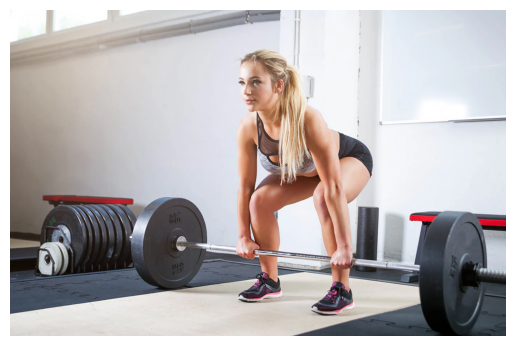

In [34]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

def prepare_image(img_path, img_size):
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalisasi sama seperti saat training
    return img_array

# Contoh penggunaan:
img_path = 'image.png'  # ganti sesuai gambar
img_input = prepare_image(img_path, IMG_SIZE)

pred = model.predict(img_input)[0]  # output array prediksi probabilitas per kelas
predicted_class_idx = np.argmax(pred)
predicted_label = list(train_generator.class_indices.keys())[predicted_class_idx]
predicted_prob = pred[predicted_class_idx]

print(f"Prediksi: {predicted_label} (probabilitas {predicted_prob:.2f})")

# Tampilkan gambar
plt.imshow(image.load_img(img_path))
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Prediksi: russian twist (probabilitas 0.98)


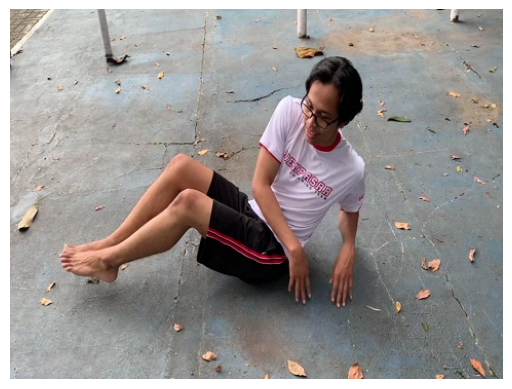

In [ ]:
def prepare_image(img_path, img_size):
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalisasi sama seperti saat training
    return img_array

# Contoh penggunaan:
img_path = 'russian twist.jpg'  # ganti sesuai gambar
img_input = prepare_image(img_path, IMG_SIZE)

pred = model.predict(img_input)[0]  # output array prediksi probabilitas per kelas
predicted_class_idx = np.argmax(predeted)
predicted_label = list(train_generator.class_indices.keys())[predicted_class_idx]
predicted_prob = pred[predicted_class_idx]

print(f"Prediksi: {predicted_label} (probabilitas {predicted_prob:.2f})")

# Tampilkan gambar
plt.imshow(image.load_img(img_path))
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
Prediksi: plank (probabilitas 0.39)


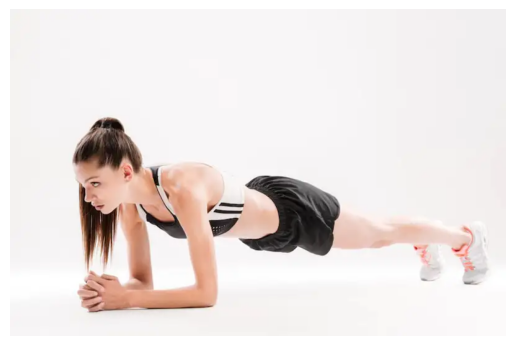

In [ ]:
def prepare_image(img_path, img_size):
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalisasi sama seperti saat training
    return img_array

# Contoh penggunaan:
img_path = 'pank.png'  # ganti sesuai gambar
img_input = prepare_image(img_path, IMG_SIZE)

pred = model.predict(img_input)[0]  # output array prediksi probabilitas per kelas
predicted_class_idx = np.argmax(pred)
predicted_label = list(train_generator.class_indices.keys())[predicted_class_idx]
predicted_prob = pred[predicted_class_idx]

print(f"Prediksi: {predicted_label} (probabilitas {predicted_prob:.2f})")

# Tampilkan gambar
plt.imshow(image.load_img(img_path))
plt.axis('off')
plt.show()


In [49]:
# contoh intrgrasi atau hasil yang ingin di capai nantinya
def hitung_bmr(berat, tinggi, umur, jenis_kelamin):
    if jenis_kelamin.lower() == 'laki-laki':
        return 10*berat + 6.25*tinggi - 5*umur + 5
    else:
        return 10*berat + 6.25*tinggi - 5*umur - 161

def kalori_terbakar(met, berat, durasi_menit):
    return 0.0175 * met * berat * durasi_menit

# MET untuk 10 gerakan
met_dict = {
    'squat': 5.0,
    'deadlift': 6.0,
    'bench_press': 6.0,
    'push_up': 8.0,
    'pull_up': 8.0,
    'plank': 3.0,
    'shoulder_press': 5.0,
    'triceps': 4.5,
    'leg_extension': 5.0
}

# Input user (bisa dari form web)
nama = "Budi"
jenis_kelamin = "laki-laki"
umur = 25
tinggi = 170  # dalam cm
berat = 65    # dalam kg
durasi = 1   # menit
gerakan = 'push_up'  # hasil deteksi model

bmr = hitung_bmr(berat, tinggi, umur, jenis_kelamin)
kalori = kalori_terbakar(met_dict[gerakan], berat, durasi)

print(f"Nama: {nama}")
print(f"Jenis Kelamin: {jenis_kelamin}")
print(f"Umur: {umur} tahun")
print(f"Tinggi: {tinggi} cm")
print(f"Berat: {berat} kg")
print(f"Gerakan: {gerakan}")
print(f"Durasi: {durasi} menit")
print(f"BMR: {bmr:.2f} kalori/hari (estimasi)")
print(f"Kalori terbakar selama latihan: {kalori:.2f} kalori")


Nama: Budi
Jenis Kelamin: laki-laki
Umur: 25 tahun
Tinggi: 170 cm
Berat: 65 kg
Gerakan: push_up
Durasi: 1 menit
BMR: 1592.50 kalori/hari (estimasi)
Kalori terbakar selama latihan: 9.10 kalori


In [38]:
print("Daftar kelas yang bisa dites:")
for label in train_generator.class_indices.keys():
    print("-", label)

Daftar kelas yang bisa dites:
- barbell biceps curl
- bench press
- chest fly machine
- deadlift
- decline bench press
- hammer curl
- hip thrust
- incline bench press
- lat pulldown
- lateral raises
- leg extension
- leg raises
- plank
- pull up
- push up
- romanian deadlift
- russian twist
- shoulder press
- squat
- t bar row
- tricep dips
- tricep pushdown


In [39]:
model.save('my_model.keras')


In [1]:
import tensorflow as tf

# Load model Keras
model = tf.keras.models.load_model("my_model.keras")

# Convert ke TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Simpan file TFLite
with open("model.tflite", "wb") as f:
    f.write(tflite_model)


INFO:tensorflow:Assets written to: C:\Users\TUF\AppData\Local\Temp\tmpabe9qg1m\assets


INFO:tensorflow:Assets written to: C:\Users\TUF\AppData\Local\Temp\tmpabe9qg1m\assets


Saved artifact at 'C:\Users\TUF\AppData\Local\Temp\tmpabe9qg1m'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer_5')
Output Type:
  TensorSpec(shape=(None, 22), dtype=tf.float32, name=None)
Captures:
  2760318468176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2760318470480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2760318470672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2760318470864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2760318469328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2760318470096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2760318472400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2760318472208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2760318471440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2760318472976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  27603